In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [2]:
datasets_dir="D:/Data science/tun_kun/tun_kun/training"
label=["day","night"]

data=[]
MyList=os.listdir(datasets_dir)
print("Total Classes  Deetected:",len(MyList))
print("Importing Class..")
for i in range(len(MyList)):
    PicList=os.listdir(datasets_dir+'/'+label[i])
    for j in PicList:
        Img=cv2.imread(datasets_dir+'/'+label[i]+"/"+j)
        Img=cv2.resize(Img,(850,560),interpolation=cv2.INTER_CUBIC)
        Img=cv2.cvtColor(Img,cv2.COLOR_BGR2HSV)
        data.append((Img,label[i]))
    print(i,end=" ")
print()


Total Classes  Deetected: 2
Importing Class..
0 1 


In [3]:
def split(data,Ratio):
    splits=random.sample(data,k=int(len(data)*Ratio))
    x=[]
    y=[]
    for i in range(len(splits)):
        x.append(splits[i][0])
        y.append(splits[i][1])
    x=np.array(x,dtype=object)
    y=np.array(y)
    return x,y

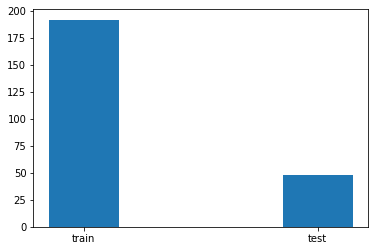

In [4]:
(x_train,y_train)=split(data,Ratio=0.8)
(x_test,y_test)=split(data,Ratio=0.2)


y=[len(x_train),len(x_test)]
x=["train","test"]
plt.bar(x,y,width = 0.3)
plt.show()

In [5]:
def mean(img):
    return int(np.sum(img[::2])/(850*560))

In [6]:
def check(img):
    mean1=mean(img)
    if mean1>124:
        return("day")
    else:
        return("night")

In [7]:
def loss(x_test,y_test):
    losses=[]
    for i in range(len(x_test)):
        img=x_test[i]
        predict=check(img)
    if not(y_test[i]==predict):
        losses.append(img)
    return losses

In [8]:
Losses=loss(x_test,y_test)

In [9]:
accuracy=(len(x_test)-len(Losses))/(len(x_test))*100
accuracy

100.0